The data has been collected from Kaggle. Source: https://www.kaggle.com/c/allstate-claims-severity/data

**Goal:** Predicting the **loss** based on the other variables in the dataset.

In [1]:
#importing libraries
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

In [2]:
import os

mingw_path = 'C:\\Program Files\\mingw-w64\\x86_64-7.2.0-posix-seh-rt_v5-rev1\\mingw64\\bin'

os.environ['PATH'] = mingw_path + ';' + os.environ['PATH']

In [37]:
#import training and test data
try:
    train_data = pd.read_csv("./train.csv/train.csv")
    test_data = pd.read_csv("./test.csv/test.csv")
except Exception as e:
    print("Datasets are not found in the specified location/failure to load")
    print(e)

In [38]:
complete = pd.DataFrame(train_data.append(test_data))

In [39]:
print(complete.shape)
print(train_data.shape)
print(test_data.shape)

(313864, 132)
(188318, 132)
(125546, 131)


In [40]:
print(complete.columns)

Index(['cat1', 'cat10', 'cat100', 'cat101', 'cat102', 'cat103', 'cat104',
       'cat105', 'cat106', 'cat107',
       ...
       'cont2', 'cont3', 'cont4', 'cont5', 'cont6', 'cont7', 'cont8', 'cont9',
       'id', 'loss'],
      dtype='object', length=132)


In [41]:
complete = complete.drop('id', axis = 1)
#Printing column names
print(complete.columns)

Index(['cat1', 'cat10', 'cat100', 'cat101', 'cat102', 'cat103', 'cat104',
       'cat105', 'cat106', 'cat107',
       ...
       'cont14', 'cont2', 'cont3', 'cont4', 'cont5', 'cont6', 'cont7', 'cont8',
       'cont9', 'loss'],
      dtype='object', length=131)


In [8]:
#printing the first 10 rows of complete data
print(complete.head(10)); 

  cat1 cat10 cat100 cat101 cat102 cat103 cat104 cat105 cat106 cat107  \
0    A     A      B      G      A      A      I      E      G      J   
1    A     B      L      F      A      A      E      E      I      K   
2    A     B      L      O      A      B      E      F      H      F   
3    B     A      I      D      A      A      E      E      I      K   
4    A     B      F      J      A      A      D      E      K      G   
5    A     A      J      D      A      A      E      E      H      F   
6    A     A      J      A      A      C      E      E      H      F   
7    A     A      H      C      A      A      K      F      F      I   
8    A     B      C      Q      A      C      H      F      G      M   
9    A     A      F      D      A      F      K      H      G      J   

     ...       cont14     cont2     cont3     cont4     cont5     cont6  \
0    ...     0.714843  0.245921  0.187583  0.789639  0.310061  0.718367   
1    ...     0.304496  0.737068  0.592681  0.614134  0.88

In [9]:
#Displaying all the columns in describe by setting display maximum columns
pd.set_option('display.max_columns', None)
print(complete.describe(include = ['O']))
complete.describe()

          cat1   cat10  cat100  cat101  cat102  cat103  cat104  cat105  \
count   313864  313864  313864  313864  313864  313864  313864  313864   
unique       2       2      15      19       9      14      17      20   
top          A       A       F       A       A       A       E       E   
freq    235646  267157   71817  177924  295386  206019   71557  127477   

        cat106  cat107  cat108  cat109   cat11  cat110  cat111  cat112  \
count   313864  313864  313864  313864  313864  313864  313864  313864   
unique      18      20      11      85       2     134      17      51   
top          G       F       B      BI       A      CL       A       E   
freq     78180   78863  108731  255052  280656   42097  214421   42109   

        cat113  cat114  cat115  cat116   cat12   cat13   cat14   cat15  \
count   313864  313864  313864  313864  313864  313864  313864  313864   
unique      63      19      23     349       2       2       2       2   
top         BM       A       K      

,cont1,cont10,cont11,cont12,cont13,cont14,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,loss
count,313864.000000,313864.000000,313864.000000,313864.000000,313864.000000,313864.000000,313864.000000,313864.000000,313864.000000,313864.000000,313864.000000,313864.000000,313864.000000,313864.00000,188318.000000
mean,0.494096,0.498403,0.493850,0.493503,0.493917,0.495665,0.507089,0.498653,0.492021,0.487513,0.491442,0.485360,0.486823,0.48571,3037.337686
std,0.187768,0.185906,0.210002,0.209716,0.212911,0.222537,0.207056,0.201961,0.211101,0.209063,0.205394,0.178531,0.199442,0.18185,2904.086186
min,0.000016,0.000000,0.035321,0.036232,0.000228,0.178568,0.001149,0.002634,0.176921,0.281143,0.012683,0.069503,0.236880,0.00008,0.670000
25%,0.347403,0.364580,0.310961,0.314945,0.315758,0.294657,0.358319,0.336963,0.327354,0.281143,0.336105,0.351299,0.317960,0.35897,1204.460000
50%,0.475784,0.461190,0.457203,0.462286,0.363547,0.407020,0.555782,0.527991,0.452887,0.422268,0.440945,0.438650,0.441060,0.44145,2115.570000
75%,0.625272,0.619840,0.678924,0.679096,0.689974,0.724707,0.681761,0.634224,0.652072,0.643315,0.655818,0.591165,0.623580,0.56889,3864.045000
max,0.984975,0.994980,0.998742,0.998484,0.988494,0.844848,0.862654,0.944251,0.956046,0.983674,0.997162,1.000000,0.982800,0.99540,121012.250000


In [15]:
#Checking the skew of the train_data
print(complete.skew())

#Checking the kurtosis of the train_data
complete.kurt()

cont1     0.513207
cont10    0.352118
cont11    0.281141
cont12    0.291998
cont13    0.376140
cont14    0.250674
cont2    -0.311147
cont3    -0.007023
cont4     0.417561
cont5     0.679614
cont6     0.458415
cont7     0.825893
cont8     0.673240
cont9     1.067252
loss      3.794958
dtype: float64


cont1     -0.108758
cont10    -0.855859
cont11    -1.049763
cont12    -1.029581
cont13    -1.352624
cont14    -1.529678
cont2     -0.892459
cont3     -0.604999
cont4     -0.961135
cont5     -0.881571
cont6     -0.767756
cont7      0.049055
cont8     -0.549578
cont9      0.552452
loss      48.079568
dtype: float64


Let us visualize the skewness and kurtosis in the dataset.

In [42]:
cont_vars = complete.iloc[:,116:130].columns.values
print(len(cont_vars))
cat_vars = complete.iloc[:,:116].columns.values
print(len(cat_vars))

14
116


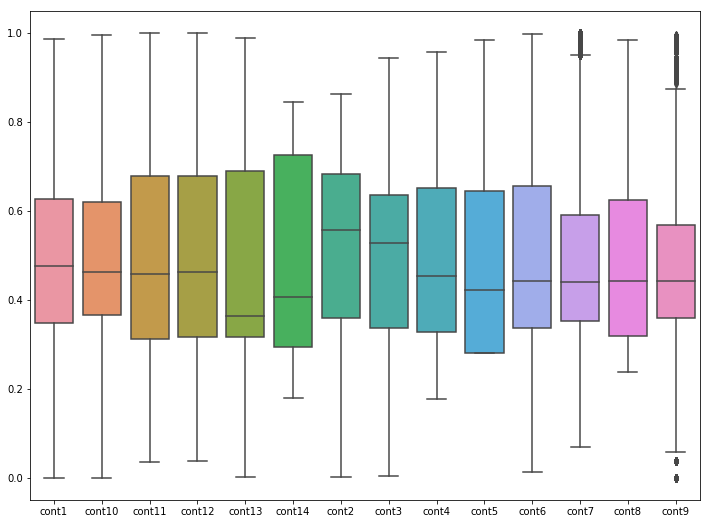

In [17]:
#sn.boxplot(train_data["cont1"])
plt.clf()
plt.figure(figsize=(12,9))
sn.boxplot(data = complete[cont_vars])

All the continuous features have some kind of skewness.

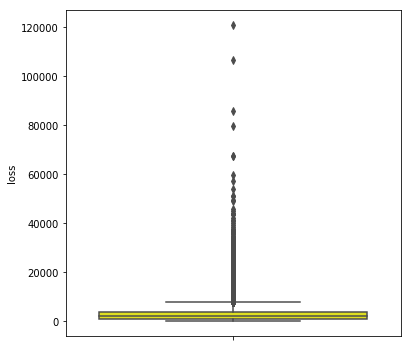

In [18]:

plt.figure(figsize=(6,6))
sn.boxplot(y = complete['loss'], width = 0.8, color = 'yellow')
plt.show()

Looks like there are many outliers in the loss variable.

There are 46427 values above the IQR. Let's apply log transformation on both the loss variable and other continuous variables to see how this turns out to be!

In [43]:
complete.iloc[:,116:] = complete.iloc[:,116:].transform(lambda x: np.log1p(x))

In [ ]:
print("*SKEW*")
print("")
print(complete.skew())
print("")
print("*KURT*")
print("")
print(complete.kurt())

Now let us visualize it using density plots.

In [ ]:
for i in range(len(cont_vars)):
    plt.figure(figsize=(8,8))
    sn.distplot(a = (complete[cont_vars[i]]), kde = True, color = 'blue')


In [ ]:
loss_col = complete['loss']
plt.figure(figsize=(8,8))
sn.distplot(a = (loss_col[:188318]), color = 'blue')
    


In [ ]:
(complete.corr())

In [ ]:
plt.figure(figsize = (14,8))
sn.heatmap(complete.corr(), cmap = 'Blues', linewidths = 0.2)

In [ ]:
print(test_new.shape)

**MODEL BUILDING**

In [44]:
# Creating dummy variables for the categorical features for further analysis
complete = pd.get_dummies(complete.iloc[:,:])
print(complete.head(2))
print(complete.shape)

      cont1    cont10    cont11    cont12    cont13    cont14     cont2  \
0  0.545980  0.607099  0.450913  0.466652  0.600205  0.539322  0.219875   
1  0.285565  0.364080  0.291409  0.312111  0.477123  0.265817  0.552199   

      cont3     cont4     cont5     cont6     cont7     cont8     cont9  \
0  0.171920  0.582014  0.270074  0.541374  0.288976  0.264362  0.513632   
1  0.465419  0.478799  0.634370  0.363891  0.362269  0.470547  0.301045   

       loss  cat1_A  cat1_B  cat10_A  cat10_B  cat100_A  cat100_B  cat100_C  \
0  7.702637       1       0        1        0         0         1         0   
1  7.158203       1       0        0        1         0         0         0   

   cat100_D  cat100_E  cat100_F  cat100_G  cat100_H  cat100_I  cat100_J  \
0         0         0         0         0         0         0         0   
1         0         0         0         0         0         0         0   

   cat100_K  cat100_L  cat100_M  cat100_N  cat100_O  cat101_A  cat101_B  \
0        

In [45]:
#188318, 132
train_new = complete.iloc[:188318,:]
print(train_new.shape)
test_new = complete.iloc[188318:,:]
print(test_new.shape)


(188318, 1191)
(125546, 1191)


In [46]:
sum(np.isnan(test_new['loss']))

125546

In [47]:
test_new = test_new.drop('loss', axis = 1)
print(test_new.shape)

(125546, 1190)


In [48]:
#Separating predictor and target features
from sklearn.model_selection import train_test_split

y = train_new['loss']
y = y.reshape(train_new.shape[0], 1)
print(type(y))
X = train_new.drop(['loss'], axis = 1)
X= X.as_matrix()
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.1, random_state = 20)


<class 'numpy.ndarray'>


In [49]:
print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
y_val.shape

(169486, 1190)
(18832, 1190)
(169486, 1)


(18832, 1)

**LASSO** for **feature selection**

In [50]:
from sklearn.metrics import mean_absolute_error as mae, r2_score as rs
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


In [51]:
lasso1 = Lasso(alpha = 0.001, random_state = 20)
lasso1.fit(X_train,y_train)
lasso_coeff = lasso1.coef_                   #Finding the important coefficients.
index = []
for i,val in enumerate(lasso_coeff):
    if val!=0:
        index.append(i)

In [52]:
X_train = X_train[:,index]                    #Selecting only important features in the train set
print(X_train.shape)
print(X_train[:2,:])

(169486, 143)
[[ 0.23960413  0.26000841  0.11961159  0.36508885  0.23722553  0.30331573
   1.          0.          1.          0.          0.          0.          0.
   1.          0.          0.          0.          0.          0.          0.
   0.          0.          1.          1.          1.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          1.          0.          0.          0.          0.
   0.          1.          0.          0.          0.          1.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          1.          0.          0.          0.
   0.          0.          1.          0.          0.          0.          0.
   0.          1.          0.          1.          0.          0.          1.
   0.          1.          1.          1.          0.          1.          0.
   1.          0.          1.          1.          1. 

In [53]:
X_val = X_val[:,index]                     #Selecting only important features in the validation set
X_val.shape

(18832, 143)

In [54]:
y_val.shape

(18832, 1)

In [117]:
test_new = test_new.iloc[:,index]
test_new.shape

(125546, 143)

Now that we have the important features selected, lets do regression with Lasso as well for the important features.

In [55]:
l1 = lasso1.fit(X_train, y_train)
result = mae(np.expm1(y_val), np.expm1(lasso1.predict(X_val)))          #Finding the mean absolute error
print(result)      #MAE = 1273.70178479

1273.70178479


**RIDGE**

In [57]:
#Ridge

alpha = list(np.arange(0,3,0.5))
rid_reg = Ridge(random_state = 20)
param_grid = {'alpha': alpha}

rid_cv = GridSearchCV(rid_reg, param_grid, verbose = 1, cv = 3)      #Applying gridsearch for ridge regression


In [58]:
rid_cv.fit(X_train,y_train)    #Fitting data to the ridge model


Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:   20.3s finished


GridSearchCV(cv=3, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=20, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.0, 0.5, 1.0, 1.5, 2.0, 2.5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [60]:
print(rid_cv.best_params_)  #Best alpha - {'alpha': 2.5}
rid_cv.best_score_   #Best R-square value - 0.51087109218284943


{'alpha': 2.5}


0.51087109218284943

We have the best parameter alpha. Let us use this alpha to find the mean absolute error.

In [62]:
rid_reg = Ridge(alpha = 2.5, random_state = 20)
rid_reg.fit(X_train,y_train)
result = mae(np.expm1(y_val), np.expm1(rid_reg.predict(X_val)))
print(result)   #MAE = 1274.54606861

1274.54606861


**LINEAR REGRESSION**

In [66]:
lin_reg = LinearRegression()
lin_cv  = cross_val_score(lin_reg, X_train, y_train, cv = 8, n_jobs = -1, verbose = 1)

[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:   21.1s finished


In [67]:
lin_cv.mean() #R-square - 0.51103152766743809

0.51103152766743809

In [68]:
lin_reg.fit(X_train, y_train)
results = mae(np.expm1(y_val), np.expm1(lin_reg.predict(X_val)))
print(results)
#MAE = 1274.55983435

1274.55983435


**DECISION TREE REGRESSOR**

In [70]:
?DecisionTreeRegressor

In [80]:

max_depth = list(range(8,13,1))
param = {'max_depth': max_depth}
dt_reg = DecisionTreeRegressor( random_state = 20)
dt_cv = GridSearchCV(dt_reg, param, cv = 3, verbose = 1)
dt_cv.fit(X_train,y_train)
print(dt_cv.best_params_)          #'max_depth': 10
dt_cv.best_score_                  #0.43054964105397264

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:  1.1min finished


{'max_depth': 10}


0.43054964105397264

In [81]:
dt_reg.fit(X_train, y_train)
results = mae(np.expm1(y_val), np.expm1(dt_reg.predict(X_val)))
print(results) #best - 1761.81618755

1761.81618755


**ELASTIC NET**

In [92]:

alpha = list(np.arange(0.001,0.003,0.001))
param_grid = {'alpha' : alpha}
elastic_net = ElasticNet(random_state = 20)
elastic_cv = GridSearchCV(elastic_net, param_grid, verbose = 1, cv = 3)     #Applying gridsearch for lasso regression
elastic_cv.fit(X_train,y_train)


Fitting 3 folds for each of 2 candidates, totalling 6 fits


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:  2.5min finished


GridSearchCV(cv=3, error_score='raise',
       estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=20, selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.001, 0.002]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring=None, verbose=1)

In [93]:
print(elastic_cv.best_params_)    #{'alpha': 0.001}
print(elastic_cv.best_score_)     #0.509733624752


{'alpha': 0.001}
0.509733624752


In [95]:
en = ElasticNet(alpha = 0.001)
en.fit(X_train, y_train)
results = mae(np.expm1(y_val), np.expm1(en.predict(X_val)))
print(results)  #1272.79920155

1272.79920155


**RANDOM FOREST REGRESSOR**

In [96]:
rf_reg = RandomForestRegressor(random_state = 20)

In [97]:
rf_reg.get_params()

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': 1,
 'oob_score': False,
 'random_state': 20,
 'verbose': 0,
 'warm_start': False}

In [115]:

param_grid = {'n_estimators': [130], 'min_samples_leaf': [15] }

rf_cv = GridSearchCV(rf_reg, param_grid, verbose = 2, cv = 3)
rf_cv.fit(X_train, y_train)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] min_samples_leaf=15, n_estimators=130 ...........................
[CV] ............ min_samples_leaf=15, n_estimators=130, total= 7.0min
[CV] min_samples_leaf=15, n_estimators=130 ...........................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  7.1min remaining:    0.0s


[CV] ............ min_samples_leaf=15, n_estimators=130, total= 6.9min
[CV] min_samples_leaf=15, n_estimators=130 ...........................
[CV] ............ min_samples_leaf=15, n_estimators=130, total= 6.8min


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed: 20.9min finished


GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=20, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [130], 'min_samples_leaf': [15]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [118]:
print(rf_cv.best_params_)
rf_cv.best_score_
#{'n_estimators': 60}
#0.51112645440335269

#{'min_samples_leaf': 40, 'n_estimators': 40}
#0.50783898364188806

#{'min_samples_leaf': 60, 'n_estimators': 40}
#0.50189638126400771

#{'min_samples_leaf': 60, 'n_estimators': 60}
#0.5021158544450387

#{'min_samples_leaf': 60, 'n_estimators': 100}
#0.50267146159802401

#{'min_samples_leaf': 30, 'n_estimators': 100}
#0.5123942073109542

#{'min_samples_leaf': 15, 'n_estimators': 100}
#0.51836110846318972

#{'min_samples_leaf': 15, 'n_estimators': 130}
#0.5186638643487953

{'min_samples_leaf': 15, 'n_estimators': 130}


0.5186638643487953

In [119]:
rf_reg = RandomForestRegressor(n_estimators = 130, min_samples_leaf = 15)
rf_reg.fit(X_train, y_train)
results = mae(np.expm1(y_val), np.expm1(rf_reg.predict(X_val)))
print(results) #1218.91973862

1218.91973862


**XGBoost Regressor**

 Ran this model on google colaboratory due to limitations of the local machine I was using. Outputs are presented as comments

In [ ]:
from xgboost import XGBRegressor

param = {'n_estimators': [1000],'max_depth' = [6], 'learning_rate' =  [0.1], 'subsample' = [0.8]}
xgb_reg = XGBRegressor()

In [ ]:
xgb_cv = GridSearchCV(xgb_reg, param, cv = 3, verbose = 1)
xgb_cv.fit(X_train, y_train)
print(xgb_cv.best_params_)
xgb_cv.best_score_

#{'n_estimators': 600}
#0.5492880376130279

#{'n_estimators': 1000}
#0.5527066986454021

#{'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 1000, 'subsample': 0.8}
#0.5488581261851038

In [ ]:
xgb_reg= XGBRegressor(n_estimators = 1000, max_depth=6, learning_rate =  0.1, subsample = 0.8)
xgb_reg.fit(X_train, y_train)
results = mae(np.expm1(y_val), np.expm1(xgb_reg.predict(X_val)))
print(results) 

#1163.7583461497657 --n_estimators = 1000, max_depth=6, learning_rate =  0.1, subsample = 0.8

**AdaBoost Regressor**

In [124]:
from sklearn.ensemble import AdaBoostRegressor
param = {'n_estimators': [100]}
ab_reg = AdaBoostRegressor(random_state = 20)


In [125]:
ab_reg.get_params()

{'base_estimator': None,
 'learning_rate': 1.0,
 'loss': 'linear',
 'n_estimators': 50,
 'random_state': 20}

In [126]:
ab_cv = GridSearchCV(ab_reg, param, cv = 3, verbose = 1, n_jobs = 2)
ab_cv.fit(X_train, y_train)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=2)]: Done   3 out of   3 | elapsed:  2.7min finished


GridSearchCV(cv=3, error_score='raise',
       estimator=AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
         n_estimators=50, random_state=20),
       fit_params=None, iid=True, n_jobs=2,
       param_grid={'n_estimators': [100]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring=None, verbose=1)

In [127]:
print(ab_cv.best_params_)
ab_cv.best_score_


{'n_estimators': 100}


0.1902591311641775

So we can see that **XGBoost Regressor** is the best model with least mean absolute error. Now lets predict the test_data on this model.

In [ ]:
test_new = test_new.iloc[:,index]
test_new.shape
ID = test_data.id
X = np.concatenate((X_train,X_val),axis=0)

Y = np.concatenate((y_train,y_val),axis=0)

#Best model
model = XGBRegressor(n_estimators = 1000, max_depth=6, learning_rate =  0.1, subsample = 0.8 ,seed=0)
model.fit(X,Y)
predictions = np.expm1(best_model.predict(test_new))



In [ ]:
with open("C:\\Users\\Arun\\Documents\\DeZyre data\\Allstate insurance severity\\submission.csv", "w") as subfile:
    subfile1.write("id,loss\n")
    for i, pred in enumerate(list(predictions)):
        subfile1.write("%s,%s\n"%(ID[i],pred))


The output file was submitted on Kaggle. The Mean absolute error was 1134.24349.